# 統計指標實作範例
## 常見於迴歸問題的評估指標
* 平均絕對誤差 - Mean Absolute Error (MAE)
* 平均平方誤差(均方差) - Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

# [教學目標]
- 開始的第一堂課 : 我們先一些機器學習的基礎開始, 需要用到一些 Python 語法  
- 如果不熟 Python, 但是至少熟悉過一門語言, 可以從這些範例開始熟悉
- 所謂評價函數 (Metric), 就是機器學習的計分方式, 範例會展示平均絕對誤差 (MAE) 的寫法
- 我們來了解意義並寫作一個函數吧!!

# [範例重點]
- 複習 / 熟悉 Python 載入套件的語法, 了解什麼是代稱 (In[1], Out[1])
- 了解 Python 如何使用 Numpy 套件, 計算我們所需要的數值與繪圖 (In[2], Out[2], In[3], Out[3])
- 如何寫作平均絕對誤差 (MAE) 函數 (In[4], Out[4])

In [58]:
# import 是 Python 載入套件的基本語法 (類似 C 語言的 include), 後面接要載入的套件
# import AAAAA as BB, 其中 BB 是代稱, 表示除了載入 AAAAA 之外, 之後都可以用 BB 代替 AAAAA 這個名稱
# 常用套件往往有其對應代稱, numpy的代稱是np, pandas的代稱是pd, matplotlib.pyplot的代稱是plt
# numpy 常用於數值/陣列運算, pandas 擅長資料格式的調整, matplotlib 擅長繪圖
import numpy as np
import matplotlib.pyplot as plt

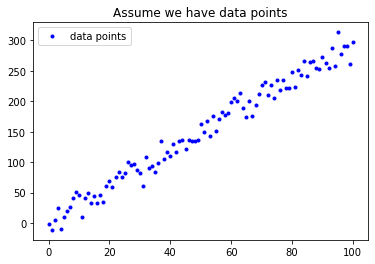

In [59]:
# Python 的變數不須宣告, 可能是文字, 數值, 陣列, 甚至是物件, 對初學者來說這往往是最難接受的地方
# 主要是 Python 在大多數情況下, 可以由運算"猜"出你想要的型態, 我們由下列語法看看發生了什麼事吧
# w, b 是數值
w = 3
b = 0.5

# np.linspace 是 numpy.linspace 的意思
# np.linspace(0, 100, 101)是指 0~100 劃分成 101 個刻度(含頭尾), 所也就是 0, 1, 2,...,100 這 101 個數
# 這時候, x_lin 因為要記錄不只一個數, 因為 np.linspace() 傳回的是一個 Array, 所以 x_lin 就變成 Array 了
x_lin = np.linspace(0, 100, 101)

# np.random.randn() 就是 numpy.random.randn(), 會隨機傳回標準常態分布的取樣值
# np.random.randn(101) 表示取樣了101次, 型態是 Array, 所以其他 + 與 * 的部分都是 Array 的加與乘, 一行就計算了101筆資料
# 所以最後的結果 y, 也是一個長度 101 的 Array
y = (x_lin + np.random.randn(101) * 5) * w + b

# 這邊就是將 x_lin 以及剛剛算完的 y, 當作座標值, 將101個點在平面上畫出來
# b. : b 就是 blue, 點(.) 就是最小單位的形狀, 詳細可以查 matplotlib 的官方說明
plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)##loc為圖例位子
plt.show()

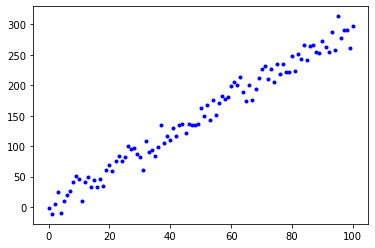

In [60]:
# 這邊的 y_hat, 就沒有隨機的部分了, 也就是下圖中的紅色實線部分
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
# 上面的 'b.' 是藍色點狀, 下面的 'r-' 是紅色線狀, label 是圖示上的名稱
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [13]:
# Python 的函數是另一個新手上手的困難點, 由def開頭, 依序是函數名稱 / 輸入值, 冒號(:)結尾
# 最難讓人習慣的是 Python 的函式與條件判斷, 前後都沒有大括弧(其他程式常見), 而是以四格空白縮排來取代
# 以本例來說, mean_absolute_error 這個函數的定義範圍到 return mae 為止, 因為中間都是縮排, 而 """ 是多行註解(井號是單行註解)
# 函數中, sum(), abs(), len() 都是 Python 原有的方法, 因此可以直接呼叫
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    # MAE : 將兩個陣列相減後, 取絕對值(abs), 再將整個陣列加總成一個數字(sum), 最後除以y的長度(len), 因此稱為"平均絕對誤差"
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 呼叫上述函式, 傳回 y(藍點高度)與 y_hat(紅線高度) 的 MAE
MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 11.209


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [61]:
##自變數
x=np.random.randn(100)
x

array([ 1.57876736, -0.47541695,  0.34636377, -2.05170159, -0.62339588,
       -0.62465996,  1.44697652,  0.39820773,  0.20834144, -0.50893761,
        0.29972981,  0.79246632,  0.30619065,  0.53776568,  0.97982712,
        0.24878074,  1.42300446,  0.12319689, -0.11577119,  0.95839772,
       -2.45721558, -0.45947452, -0.40707033,  2.38134138, -0.6003433 ,
       -1.32094977, -1.19044078, -0.34465351, -1.09369962, -2.00054897,
        2.14296066, -1.6448903 ,  0.08120802, -0.96185212, -0.64351584,
        2.17212732, -0.43822565,  0.33973769,  0.1805805 , -0.19553683,
       -0.19232393, -2.09914852, -0.59454947, -0.21397007, -1.08500601,
       -0.05598484,  2.23699285,  0.34936699, -2.99050702,  0.59310515,
        0.53386465, -0.57346746, -1.33942172,  2.14188922, -1.02788565,
       -0.8714898 ,  0.20370052,  0.35928373, -0.32911559,  0.04031626,
        1.25863119,  1.48530126, -1.13372335,  0.67697484, -0.2226956 ,
        0.70401159,  0.96946376, -1.04362759,  1.44871547,  0.30

In [62]:
x.shape

(100,)

In [63]:
##應變數(實際值)
w=100
b=4
y=w*x+b
y

array([ 161.8767358 ,  -43.54169494,   38.63637676, -201.17015864,
        -58.33958798,  -58.4659958 ,  148.6976518 ,   43.82077347,
         24.83414408,  -46.89376086,   33.97298143,   83.24663178,
         34.61906466,   57.77656776,  101.98271234,   28.87807405,
        146.30044627,   16.31968915,   -7.57711922,   99.839772  ,
       -241.72155832,  -41.94745154,  -36.70703281,  242.13413792,
        -56.03432956, -128.09497651, -115.0440776 ,  -30.46535129,
       -105.36996168, -196.05489742,  218.29606602, -160.48902977,
         12.12080244,  -92.18521219,  -60.35158382,  221.21273167,
        -39.82256488,   37.97376881,   22.05805003,  -15.553683  ,
        -15.23239319, -205.91485196,  -55.45494703,  -17.39700738,
       -104.50060055,   -1.5984842 ,  227.69928547,   38.93669926,
       -295.05070215,   63.31051529,   57.38646502,  -53.34674628,
       -129.94217175,  218.18892169,  -98.78856475,  -83.14898013,
         24.37005243,   39.92837324,  -28.91155885,    8.03162

In [64]:
y.shape

(100,)

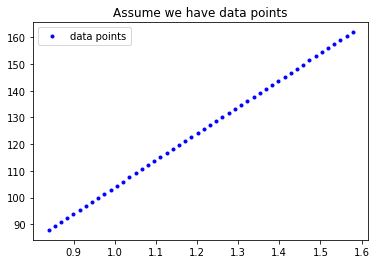

In [65]:
##畫圖
x_lin=np.linspace(x[0],x[-1])##x軸刻度
y_lin=np.linspace(y[0],y[-1])##y=100*x+4
plt.plot(x_lin, y_lin, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)##loc為圖例位子
plt.show()

[557.8767358  352.45830506 434.63637676 194.82984136 337.66041202
 337.5340042  544.6976518  439.82077347 420.83414408 349.10623914
 429.97298143 479.24663178 430.61906466 453.77656776 497.98271234
 424.87807405 542.30044627 412.31968915 388.42288078 495.839772
 154.27844168 354.05254846 359.29296719 638.13413792 339.96567044
 267.90502349 280.9559224  365.53464871 290.63003832 199.94510258
 614.29606602 235.51097023 408.12080244 303.81478781 335.64841618
 617.21273167 356.17743512 433.97376881 418.05805003 380.446317
 380.76760681 190.08514804 340.54505297 378.60299262 291.49939945
 394.4015158  623.69928547 434.93669926 100.94929785 459.31051529
 453.38646502 342.65325372 266.05782825 614.18892169 297.21143525
 312.85101987 420.37005243 435.92837324 367.08844115 404.03162554
 525.86311906 548.53012586 286.62766487 467.69748405 377.7304402
 470.40115872 496.94637552 295.63724077 544.87154701 430.36842808
 361.60637854 331.96942503 404.36322395 517.44526973 276.08579981
 438.45683382 3

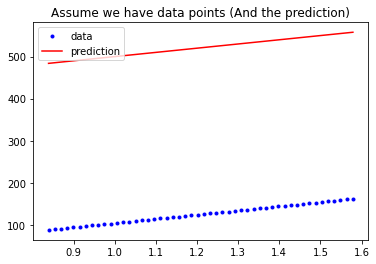

In [67]:
# 這邊的 y_hat, 就沒有隨機的部分了, 也就是下圖中的紅色實線部分
bb=400
y_hat = x * w + bb##預測值
print(y_hat)
print(y_hat.shape)
x_hat_lin = np.linspace(x[0],x[-1])
y_hat_lin = np.linspace(y_hat[0],y_hat[-1])
plt.plot(x_lin, y_lin, 'b.', label = 'data')


# 上面的 'b.' 是藍色點狀, 下面的 'r-' 是紅色線狀, label 是圖示上的名稱
plt.plot(x_hat_lin, y_hat_lin, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [68]:
def mse(y,y_hat):
    """
    計算 MAE
    Args:
        - y: 實際值
        - y_hat: 預測值
    Return:
        - msq: MSQ
    """
    # MSE : 將MAE平方再開根號, 因此稱為"平均絕對誤差"
    mse=MSE = (sum(abs(y - y_hat)**2))**0.5 / len(y)
    return mse

# 呼叫上述函式, 傳回 y(藍點高度)與 y_hat(紅線高度) 的 MAE
MSE = mse(y, y_hat)
print("The Mean absolute error is %.3f" % (MSE))

The Mean absolute error is 39.600
